In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
votes = pd.DataFrame.from_csv('AnsVotes_TSeries.csv', index_col=None)
votes.head(10)

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,CumVotes,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias
0,1,56,0,201,56,0,0,2,2,2,2,0.666667,0,0,1,1,1,1,0,1
1,2,10,0,145,10,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
2,2,10,0,145,10,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
3,3,9,0,25,109,0,0,4,4,4,4,0.800000,0,0,1,1,1,1,0,1
4,7,16,0,45,2977,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
5,14,20,0,28,20,0,0,7,7,7,7,0.875000,0,0,1,1,1,1,0,1
6,18,33,0,133,33,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
7,18,33,0,133,33,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
8,18,33,0,133,33,0,0,3,3,3,3,0.750000,0,0,1,1,1,1,0,1
9,21,80,0,43,80,0,0,1,1,1,1,0.500000,0,0,1,1,1,1,0,1


In [3]:
votes.columns

Index([u'QuestionId', u'AnsId', u'Age_vot', u'AnsWordCount', u'AcceptedAnsId',
       u'QScore', u'QVotes', u'Score', u'Votes', u'CumVotes', u'CumScore',
       u'ReScore', u'QReScore', u'Comments', u'AnsRank', u'ReScore_rank',
       u'Ans_count', u'Pbias', u'DRank', u'EPbias'],
      dtype='object')

In [4]:
votes[['Age_vot','AnsWordCount','Comments','Ans_count','Votes']].describe()

,Age_vot,AnsWordCount,Comments,Ans_count,Votes
count,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000
mean,212.595508,143.485039,2.033522,2.721622,1.445773
std,380.532603,150.314528,2.851866,2.061537,1.040349
min,0.000000,3.000000,0.000000,1.000000,1.000000
25%,1.000000,51.000000,0.000000,1.000000,1.000000
50%,7.000000,97.000000,1.000000,2.000000,1.000000
75%,231.000000,178.000000,3.000000,3.000000,1.000000
max,1504.000000,2142.000000,18.000000,12.000000,12.000000


In [5]:
votes[['ReScore','QReScore','Pbias','EPbias']].describe()

,ReScore,QReScore,Pbias,EPbias
count,23328.000000,23328.000000,23328.000000,23328.000000
mean,0.709506,0.669346,0.778752,0.584075
std,0.256047,0.330834,0.296463,0.302189
min,-0.875000,-0.875000,0.090909,0.005837
25%,0.666667,0.625000,0.500000,0.407261
50%,0.800000,0.800000,1.000000,0.496412
75%,0.875000,0.900000,1.000000,1.000000
max,0.981481,0.979592,1.000000,1.000000


In [14]:
#votes[['log_Comments','log_AnsWordCount','log_DRank','log_QScore','log_QVotes',
#log_Score','log_Votes','log_CumVotes','log_CumScore']].describe()

,log_Comments,log_AnsWordCount,log_DRank,log_QScore,log_QVotes,log_Score,log_Votes,log_CumVotes,log_CumScore
count,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000,23328.000000
mean,0.770312,4.558133,2.080226,2.639874,1.734719,1.653324,0.839298,1.675927,2.551954
std,0.792142,0.932438,0.144555,0.503274,1.043817,0.197792,0.296533,0.741073,0.385146
min,0.000000,1.386300,0.000000,0.000000,0.000000,0.000000,0.693100,0.693100,0.000000
25%,0.000000,3.951200,2.079400,2.302600,1.098600,1.609400,0.693100,1.098600,2.302600
50%,0.693100,4.585000,2.079400,2.564900,1.791800,1.609400,0.693100,1.609400,2.484900
75%,1.386300,5.187400,2.079400,2.890400,2.397900,1.609400,0.693100,2.079400,2.708100
max,2.944400,7.670000,2.890400,4.189700,4.143100,2.772600,2.564900,4.143100,4.158900


In [9]:
#votes = votes[ votes.age_vot>=3]
votes_r = votes[votes.Age_vot<=7]
votes_r[['Score','Votes','CumScore','CumVotes','QScore','QVotes','ReScore','QReScore','Ans_count','DRank']].describe()

,Score,Votes,CumScore,CumVotes,QScore,QVotes,ReScore,QReScore,Ans_count,DRank
count,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000,11949.000000
mean,1.674785,1.787765,3.338020,3.505733,4.262030,4.482802,0.667576,0.523072,1.892125,0.069462
std,1.404004,1.326312,2.641695,2.575425,6.957248,7.212644,0.233654,0.380433,1.204971,0.589805
min,-3.000000,1.000000,-6.000000,1.000000,-7.000000,0.000000,-0.857143,-0.875000,1.000000,-4.000000
25%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,0.750000,0.666667,2.000000,0.000000
75%,2.000000,2.000000,5.000000,5.000000,6.000000,6.000000,0.833333,0.833333,2.000000,0.000000
max,12.000000,12.000000,18.000000,18.000000,58.000000,62.000000,0.947368,0.979592,9.000000,8.000000


# Votes/day on a given answer . (Context information: question, ans aggregates)

# Does user quality estimation boost/reduce votes with respect to quality?

                1         2         3         4         5         6
ReScore  1.468211  1.371319  1.343079  1.331610  1.327997  1.327188
DRank    0.000000 -0.184078 -0.166000 -0.161494 -0.155221 -0.147797


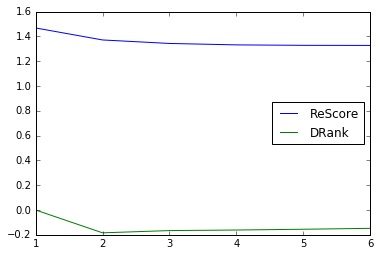

In [178]:
##DRank (+) crwod underestimates
##DRank (-) crowd overestimate
fml = 'np.log(Votes+1) ~ ReScore + DRank -1'
mat_1 = []
r2s_1 = []
acounts = [e+1 for e in range(6)]
for ans_count in acounts:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=ans_count])
    rslt = mod.fit()
    mat_1.append(rslt.params)
    r2s_1.append(rslt.rsquared)
mat_1 = pd.DataFrame(mat_1, index=[str(x) for x in acounts])
print mat_1.T
mat_1.plot()
#underestimate produces relative drecrease (in Votes) of ~20% w/r to ReScore(ans_quality)

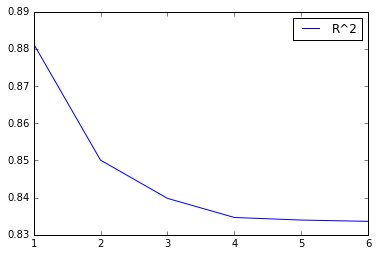

In [179]:
plt.plot(acounts,r2s_1,label='R^2')
plt.legend(loc='upper right')
plt.show()

# Do users correct for position bias?

             1         2         3         4         5         6
Pbias  1.05278  1.069563  1.077669  1.080445  1.080574  1.081424
DRank  0.00000  0.256133  0.225358  0.197568  0.191629  0.183998


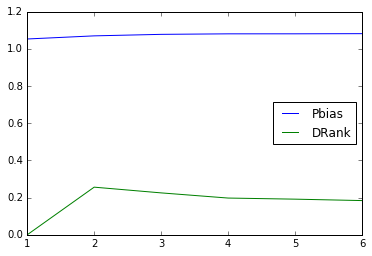

In [180]:
fml = 'np.log(Votes+1) ~ Pbias + DRank -1'
mat_2 = []
r2s_2 = []
acounts = [e+1 for e in range(6)]
for ans_count in acounts:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=ans_count])
    rslt = mod.fit()
    mat_2.append(rslt.params)
    r2s_2.append(rslt.rsquared)
mat_2 = pd.DataFrame(mat_2, index=[str(x) for x in acounts])
print mat_2.T
mat_2.plot()
#underestimate produces relative increase (in Votes) of ~25% w/r to Position bias (helps lower positions)
# rel decrease (corrects top positions)

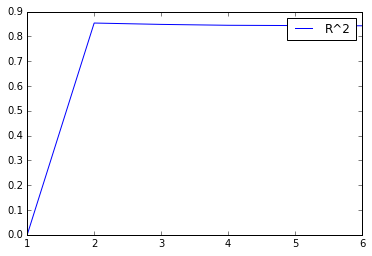

In [181]:
plt.plot(acounts,r2s_2,label='R^2')
plt.legend(loc='upper right')
plt.show()

# Group Ranks

In [173]:
levels = [e+1 for e in range(4)]
contrast = KRanksG().code_with_intercept(levels)
print contrast.matrix

[[ 1.  3.  0.  0.]
 [ 1. -1.  2.  0.]
 [ 1. -1. -1.  1.]
 [ 1. -1. -1. -1.]]


In [15]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + Pbias + C(AnsRank,KRanksG) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        03:57:34   Log-Likelihood:                 6125.1
No. Observations:               11573   AIC:                        -1.224e+04
Df Residuals:                   11566   BIC:                        -1.218e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
C(An

In [84]:
fml = 'np.log(Votes+1) ~ ReScore + Pbias + Score +  C(AnsRank,KRanksG) -1'
mat = []
mses = []
r2s = []
alphas = np.arange(0, 0.26, 0.05)
for alpha in alphas:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=4])
    rslt = mod.fit_regularized(alpha=alpha)
    mat.append(rslt.params)
    mses.append(rslt.mse_resid)
    r2s.append(rslt.rsquared)
mat = pd.DataFrame(mat[::-1], index=[str(x) for x in np.around(-np.log(alphas + 0.05),decimals=3)[::-1]])
print mat.T

                                       1.204     1.386     1.609     1.897  \
C(AnsRank, KRanksG)[K-r.intercept]  0.130896  0.217481  0.304066  0.390651   
C(AnsRank, KRanksG)[K-r.2]          0.030008  0.023093  0.016179  0.009264   
C(AnsRank, KRanksG)[K-r.3]          0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanksG)[K-r.4]          0.000000  0.000000  0.000000  0.000000   
ReScore                             0.000000  0.000000  0.000000  0.000000   
Pbias                               0.000000  0.000000  0.000000  0.000000   
Score                               0.307152  0.292451  0.277750  0.263049   

                                       2.303     2.996  
C(AnsRank, KRanksG)[K-r.intercept]  0.477236  0.570149  
C(AnsRank, KRanksG)[K-r.2]          0.002350 -0.056268  
C(AnsRank, KRanksG)[K-r.3]          0.000000 -0.025600  
C(AnsRank, KRanksG)[K-r.4]          0.000000 -0.016460  
ReScore                             0.000000 -0.401547  
Pbias                            

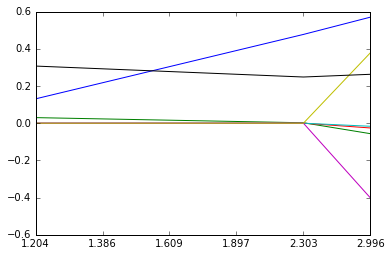

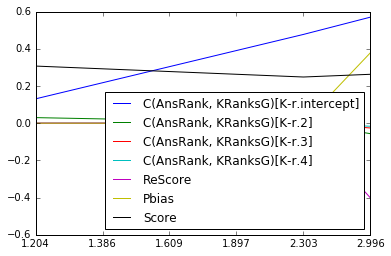

In [85]:
#With no regularization: Groups contribute positively with respect to top individual answers. Coefficients don't seem inflated, so interpretation is plausible.
# Pbias and ReScore die after first step of regularization (0.015). Score thrives
mat.plot(legend=False)
mat.plot()

## Kranks (NB: mean of contrast is relative to mean of individual effect of top answer)

In [10]:
levels = [e+1 for e in range(4)]
contrast = KRanks(1).code_with_intercept(levels)
print contrast.matrix

[[-1. -1. -1. -1.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [12]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + EPbias + C(AnsRank,KRanks(1)) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.088e+04
Date:                Sun, 03 Apr 2016   Prob (F-statistic):               0.00
Time:                        02:50:46   Log-Likelihood:                 6162.6
No. Observations:               11573   AIC:                        -1.231e+04
Df Residuals:                   11566   BIC:                        -1.226e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
C(AnsRank, KRanks(

In [86]:
# Removes contrast tag against level to compare to (omit_i)
fml = 'np.log(Votes+1) ~ ReScore + EPbias + Score +  C(AnsRank,KRanks(1)) -1'
mat = []
mses = []
r2s = []
alphas = np.arange(0, 0.07, 0.01)
for alpha in alphas:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=4])
    rslt = mod.fit_regularized(alpha=alpha)
    mat.append(rslt.params)
    mses.append(rslt.mse_resid)
    r2s.append(rslt.rsquared)
mat = pd.DataFrame(mat[::-1], index=[str(x) for x in np.around(-np.log(alphas + 0.01),decimals=3)[::-1]])
print mat.T

                                2.526     2.659     2.813     2.996     3.219  \
C(AnsRank, KRanks(1))[mean]  0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.2]   0.000000  0.000000  0.000000  0.000000  0.031282   
C(AnsRank, KRanks(1))[S.3]   0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.000000  0.000000  0.000000   
ReScore                      0.034259  0.073109  0.111959  0.150808  0.172518   
EPbias                       0.369929  0.379168  0.388407  0.397646  0.443181   
Score                        0.302274  0.291494  0.280713  0.269932  0.260467   

                                3.507     3.912     4.605  
C(AnsRank, KRanks(1))[mean]  0.000000 -0.264903 -3.060290  
C(AnsRank, KRanks(1))[S.2]   0.063715  0.176830  0.762379  
C(AnsRank, KRanks(1))[S.3]   0.000000  0.070336  0.760198  
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.761587  
ReScore                      0.193598  0.144608 -0.

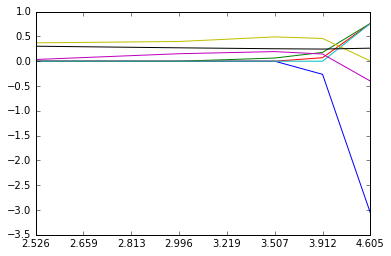

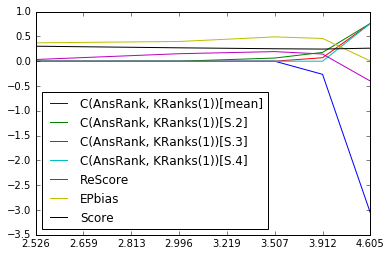

In [87]:
# Coefficients are small because these are relative increase/decrease
# After first setp of regularization(0.015) there's evidence for the model: (e.g. 2 optimizes w/r to 3)
# ReScore+EPbias+Score (all pos) + C(AnsRank,KRanks(2))[s.2,3,4] (neg e.g. pos 2 contributes positively w/r to 3)
#
#Interestingly, lower positions contribute positively compared to top position (rel to individual eff of first).
#Does this mean they compensate for Pbias,Score ? Also, note that C(AnsRank,KRanks(2))[s.2] has max value among contrasts (joint information with top pos)
#
# Note that C(AnsRank,KRanks(2))[s.2] and C(AnsRank,KRanks(2))[mean] die after (0.015)
# At 0.0 coeffs are really inflated (interpretation between -1,1 is not useless for Score,ReScore and EPbias at that point). Indeed, regularization is necessary
mat.plot(legend=False)
mat.plot()

## Poisson Regression

In [98]:
mod_poi = smf.glm('Votes ~ ReScore + EPbias + Score  - 1 ', data=votes,
                  family=sm.families.Poisson(link=sm.families.links.log)).fit(method='bfgs') #
#print mod_poi.mle_retvals['converged']
print mod_poi.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Votes   No. Observations:                23328
Model:                            GLM   Df Residuals:                    23325
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -26890.
Date:                Sat, 02 Apr 2016   Deviance:                       2634.0
Time:                        03:10:15   Pearson chi2:                 2.62e+03
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore       -0.3761      0.016    -24.106      0.000        -0.407    -0.346
EPbias         0.1970      0.017     11.755      0.0

## How does question quality relate to answer quality

In [19]:
#Comments Ans_count AnsWordCount DRank Age_vot
four_ans = smf.ols(formula='QReScore ~ ReScore + EPbias - 1 ', data=votes_r[votes_r['Ans_count']==4])
re_four = four_ans.fit()
print re_four.summary()

                            OLS Regression Results                            
Dep. Variable:               QReScore   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sat, 02 Apr 2016   Prob (F-statistic):          6.16e-214
Time:                        23:20:51   Log-Likelihood:                -181.87
No. Observations:                 593   AIC:                             367.7
Df Residuals:                     591   BIC:                             376.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore        0.4712      0.037     12.674      0.0

In [106]:
mod_poi = smf.glm('QReScore ~ ReScore + EPbias - 1 ', data=votes[votes['Ans_count']==4],
                  family=sm.families.Poisson(link=sm.families.links.log)).fit(method='bfgs') #
#print mod_poi.mle_retvals['converged']
print mod_poi.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               QReScore   No. Observations:                 2172
Model:                            GLM   Df Residuals:                     2170
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2016.8
Date:                Sat, 02 Apr 2016   Deviance:                       168.97
Time:                        14:28:45   Pearson chi2:                     143.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore        0.0081      0.067      0.121      0.904        -0.123     0.139
EPbias        -0.7037      0.172     -4.091      0.0

In [6]:
from patsy.contrasts import ContrastMatrix

def _name_levels(prefix, levels):
    return ["[%s%s]" % (prefix, level) for level in levels]

class KRanksG(object):
    """K-rank contrasts.
       Compare relative effect on output variable for a given level
       against all those below.
       
       # Reduced rank
       dmatrix("C(a, KRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, KRanks)", balanced(a=4))
    """
    def _kranksg_contrast(self, levels):
        n = len(levels)
        contr = np.zeros((n, n - 1))
        contr[:-1][np.diag_indices(n - 1)] = np.arange(1, n)[::-1]
        rows,cols = np.tril_indices(n-1)
        contr[(rows+1,cols)] = -1
        return contr

    def code_with_intercept(self, levels):
        contrast = np.column_stack((np.ones(len(levels)),
                                    self._kranksg_contrast(levels)))
        column_suffixes = _name_levels("K-r.", ["intercept"] + list(levels[1:]))
        return ContrastMatrix(contrast, column_suffixes)

    def code_without_intercept(self, levels):
        contrast = self._kranksg_contrast(levels)
        return ContrastMatrix(contrast, _name_levels("K-r.", levels[1:]))
                              

In [7]:
from patsy.contrasts import ContrastMatrix
class KRanks(object):
    """
       # Reduced rank
       dmatrix("C(a, TwoRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, TwoRanks)", balanced(a=4))
       # Omit a different level
       dmatrix("C(a, TwoRanks(1))", balanced(a=3))
       dmatrix("C(a, TwoRanks('a1'))", balanced(a=3))
    """
    #We assume levels are all different
    def _get_level(self,levels,omit):
        return levels.index(omit)
    
    def __init__(self, omit=None):
        self.omit = omit

    def _omit_i(self, levels):
        if self.omit is None:
            # We assume below that this is positive
            return len(levels) - 1
        else:
            return self._get_level(levels, self.omit)

    def _kranks_contrast(self, levels):
        n = len(levels)
        omit_i = self._omit_i(levels)
        #self._omit_i(levels)
        eye = np.eye(n - 1)
        out = np.empty((n, n - 1))
        out[:omit_i, :] = eye[:omit_i, :]
        out[omit_i, :] = -1
        out[omit_i + 1:, :] = eye[omit_i:, :]
        return out

    def code_with_intercept(self, levels):
        contrast = self.code_without_intercept(levels)
        n_zeros = np.zeros(len(levels))
        np.put(n_zeros,0,[-1])
        matrix = np.column_stack((n_zeros,
                                  contrast.matrix))
        column_suffixes = ["[mean]"] + contrast.column_suffixes
        return ContrastMatrix(matrix, column_suffixes)

    def code_without_intercept(self, levels):
        matrix = self._kranks_contrast(levels)
        omit_i = self._omit_i(levels)
        included_levels = levels[:omit_i] + levels[omit_i + 1:]
        return ContrastMatrix(matrix, _name_levels("S.", included_levels))


In [18]:
alphas = np.arange(0, 0.125, 0.015)
alphas

array([0.000, 0.015, 0.030, 0.045, 0.060, 0.075, 0.090, 0.105, 0.120])

In [43]:

np.concatenate((np.array([0]),alphas[1:]))[::-1]

array([0.350, 0.300, 0.250, 0.200, 0.150, 0.100, 0.050, 0.000])

In [44]:
a = ['a','g','h']

In [45]:
a

['a', 'g', 'h']

In [46]:
a[::-1]

['h', 'g', 'a']